In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn; 
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation); 
#                  https://docs.python.org/3.7/ (Recommended version – 3.7). 
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html 

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific 
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived 
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, 
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, 
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/ 
#     Docs: https://pandas.pydata.org/docs/ 
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html 
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a 
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.8.16
numpy version: 1.21.6
pandas version:  1.3.5
seaborn version: 0.11.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>


# [Understanding SVM Kernels](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html) on [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

load dataset - [sklearn.datasets.load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

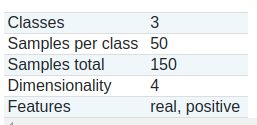

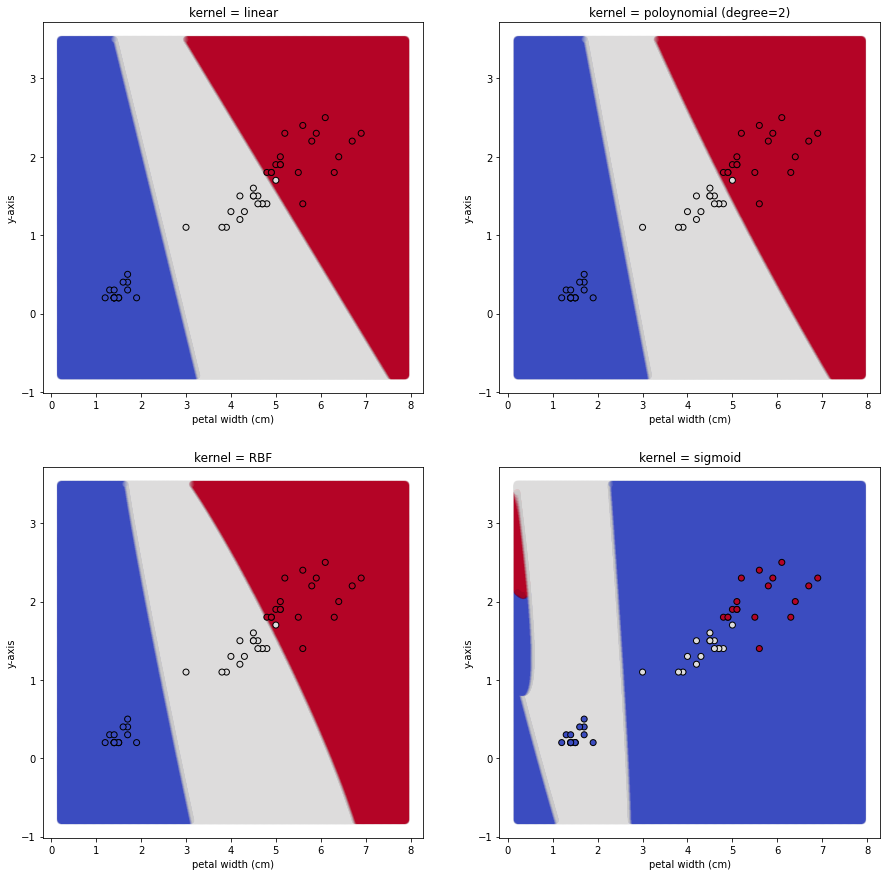

### load data 

In [2]:
# load dataset module 
from sklearn.datasets import load_iris 

# make load dataset (as bunch)
iris_dataset=load_iris()

# see info of dataset 
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# see data shape - inputs / X / independent variables 
print('Data shape (inputs):',iris_dataset.data.shape)# iris_dataset.data -> numpy.ndarray
# shape -> 150 rows / sample / instances, 4 - columns / features / attributes
# see feature (column) names 
print('Column names:',iris_dataset.feature_names)
# see labels shape - outputs / y / dependent variables 
print('Labels shape (outputs):',iris_dataset.target.shape)# iris_dataset.target -> numpy.ndarray
# see labels names 
print('Labels name:',iris_dataset.target_names)

Data shape (inputs): (150, 4)
Column names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels shape (outputs): (150,)
Labels name: ['setosa' 'versicolor' 'virginica']


### convert to pandas dataframe 

In [4]:
# convert data to pandas dataframe 
iris_df=pd.DataFrame(data=iris_dataset.data,columns=iris_dataset.feature_names)
# see head 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# add labels 
iris_df['labels']=iris_dataset.target
# see tail 
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
# decode labels 
iris_df['labels']=iris_df['labels'].apply(lambda value: iris_dataset.target_names[value])
# see head 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### make pairplot using [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) 

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns. This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.

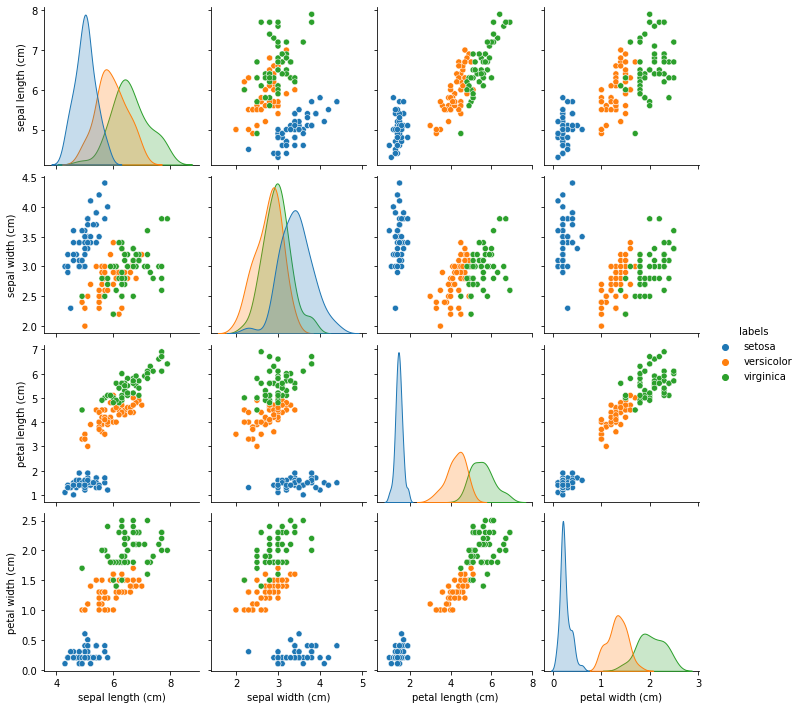

In [7]:
# make pair plot 
sns.pairplot(data=iris_df,hue='labels')
# make show 
plt.show()

### make split dataset using - [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [10]:
# load data splitter 
from sklearn.model_selection import train_test_split

# make data split (only taking columns - 'petal length (cm)' and 'petal width (cm)',
# as having maximum correlation score) 
Xtrain,Xtest,ytrain,ytest=train_test_split(iris_df.iloc[:,2:4],iris_dataset.target,
                                           test_size=0.33)
# see data shape 
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((100, 2), (100,), (50, 2), (50,))

### [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

### [Kernel functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions)

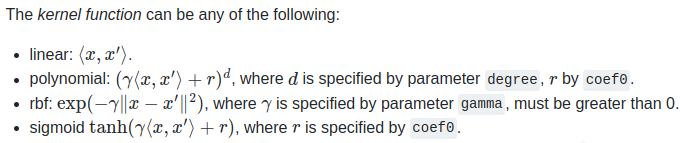

In [8]:
# load Support Vector Machine Classification 
from sklearn.svm import SVC

#### [Kernel-function](https://scikit-learn.org/stable/modules/svm.html#kernel-functions) -  Linear : `<x, x'>` 

In [11]:
# make model (object)
linear_SVC=SVC(C=1,kernel='linear')
# make model train 
linear_SVC.fit(Xtrain,ytrain)
# evaluate model 
print('Training accuracy:',linear_SVC.score(Xtrain,ytrain))
print('Testing accuracy:',linear_SVC.score(Xtest,ytest))

Training accuracy: 0.95
Testing accuracy: 0.98


#### [Kernel-function](https://scikit-learn.org/stable/modules/svm.html#kernel-functions) -  polynomial : (&gamma; `<x, x'> + r`)<sup>d</sup> ; where, where `d` is specified by parameter degree, `r` by `coef0` and &gamma; by `gamma`.

In [12]:
# make model (object) (default degree=3)
poly_SVC=SVC(C=1,kernel='poly',degree=2,gamma='scale',coef0=0)
# make model train 
poly_SVC.fit(Xtrain,ytrain)
# evaluate model 
print('Training accuracy:',poly_SVC.score(Xtrain,ytrain))
print('Testing accuracy:',poly_SVC.score(Xtest,ytest))

Training accuracy: 0.97
Testing accuracy: 0.98


### [Kernel-function](https://scikit-learn.org/stable/modules/svm.html#kernel-functions) -  rbf : exp( - &gamma; ||x, x'||<sup>2</sup>) ; where, where &gamma; is specified by parameter `gamma`.

In [13]:
# make model (object) 
rbf_SVC=SVC(C=1,kernel='rbf',gamma='scale')
# make model train 
rbf_SVC.fit(Xtrain,ytrain)
# evaluate model 
print('Training accuracy:',rbf_SVC.score(Xtrain,ytrain))
print('Testing accuracy:',rbf_SVC.score(Xtest,ytest))

Training accuracy: 0.96
Testing accuracy: 0.96


#### [Kernel-function](https://scikit-learn.org/stable/modules/svm.html#kernel-functions) sigmoid - tanh(`<x, x'> + r`) ; where where `r` is specified by parameter `coef0` 

In [14]:
# make model (object) 
sigmoid_SVC=SVC(C=1,kernel='sigmoid',coef0=1)
# make model train 
sigmoid_SVC.fit(Xtrain,ytrain)
# evaluate model 
print('Training accuracy:',sigmoid_SVC.score(Xtrain,ytrain))
print('Testing accuracy:',sigmoid_SVC.score(Xtest,ytest))

Training accuracy: 0.0
Testing accuracy: 0.0


### Plot kernel boundaries 

#### make function to plot boundaries 

In [15]:
# load warnings 
import warnings 

# make class 
class DecisionBoundaryDisplay: 

  def __init__(self):
    
    pass

  @classmethod
  def from_estimator(self,estimator,X,cmap=plt.cm.coolwarm,alpha=0.05,
                     xlabel='x-axis',ylabel='y-axis'):

    # generate n points 
    n=1000
    # gap along axis 
    gap=1
    # make generate gird 
    xx=np.linspace(np.min(X[:,0])-gap,np.max(X[:,0])+1,num=n)
    yy=np.linspace(np.min(X[:,1])-gap,np.max(X[:,1])+gap,num=n)
    # generate grid 
    xx,yy=np.meshgrid(xx,yy)
    # reshape array to n rows 1 column
    xx,yy=xx.reshape(-1,1),yy.reshape(-1,1)
    # subpress warnings 
    with warnings.catch_warnings():
      # apply warning filter 
      warnings.filterwarnings('ignore',category=UserWarning)
      # make classification on each data point 
      labels=estimator.predict(np.concatenate((xx,yy),axis=1))
    # make plot results 
    plt.scatter(xx,yy,c=labels,alpha=alpha,cmap=cmap)
    # add axis labels 
    plt.xlabel(xlabel),plt.ylabel(ylabel)

#### make plot boundaries

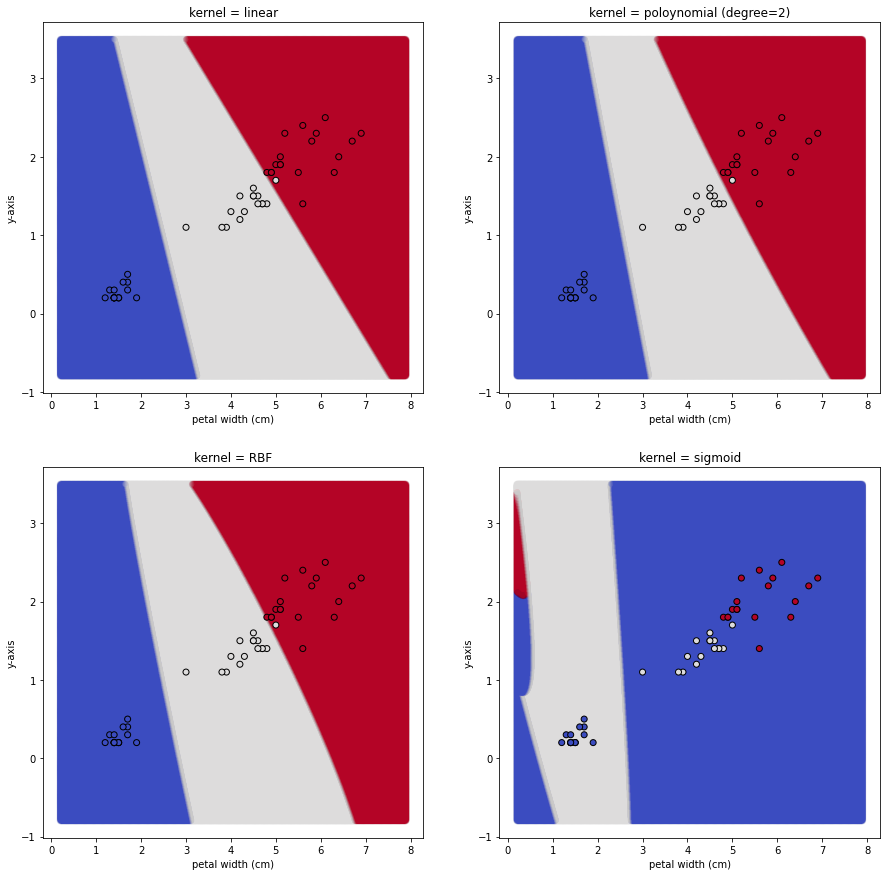

In [16]:
# load module to plot decision boundary 
#from sklearn.inspection import DecisionBoundaryDisplay # only for scikit-learn 1.1.3 or later 

# make plot figure 
plt.figure(figsize=(15,15))

# make subplot - 1
plt.subplot(2,2,1)
# make plot boundary for linear model 
DecisionBoundaryDisplay.from_estimator(linear_SVC,Xtest.values)
# make plot data points 
plt.scatter(Xtest.values[:,0],Xtest.values[:,1],c=ytest,cmap=plt.cm.coolwarm,edgecolors='black')
# add labels and title 
plt.xlabel(iris_dataset.feature_names[-2]),plt.xlabel(iris_dataset.feature_names[-1])
plt.title('kernel = linear')

# make subplot - 2
plt.subplot(2,2,2)
# make plot boundary for poloynomial model 
DecisionBoundaryDisplay.from_estimator(poly_SVC,Xtest.values)
# make plot data points 
plt.scatter(Xtest.values[:,0],Xtest.values[:,1],c=ytest,cmap=plt.cm.coolwarm,edgecolors='black')
# add labels and title 
plt.xlabel(iris_dataset.feature_names[-2]),plt.xlabel(iris_dataset.feature_names[-1])
plt.title('kernel = poloynomial (degree=2)')

# make subplot - 3
plt.subplot(2,2,3)
# make plot boundary for poloynomial model 
DecisionBoundaryDisplay.from_estimator(rbf_SVC,Xtest.values)
# make plot data points 
plt.scatter(Xtest.values[:,0],Xtest.values[:,1],c=ytest,cmap=plt.cm.coolwarm,edgecolors='black')
# add labels and title 
plt.xlabel(iris_dataset.feature_names[-2]),plt.xlabel(iris_dataset.feature_names[-1])
plt.title('kernel = RBF')

# make subplot - 4
plt.subplot(2,2,4)
# make plot boundary for poloynomial model 
DecisionBoundaryDisplay.from_estimator(sigmoid_SVC,Xtest.values)
# make plot data points 
plt.scatter(Xtest.values[:,0],Xtest.values[:,1],c=ytest,cmap=plt.cm.coolwarm,edgecolors='black')
# add labels and title 
plt.xlabel(iris_dataset.feature_names[-2]),plt.xlabel(iris_dataset.feature_names[-1])
plt.title('kernel = sigmoid')

# make plot show
plt.show()

# References / Further reading

* [Official python docs](https://docs.python.org/3/)
* [Official python tutorials](https://docs.python.org/3/tutorial/index.html)
* [Python Numpy Tutorial (with Jupyter and Colab) - Stanford - Spring 2022](https://cs231n.github.io/python-numpy-tutorial/)
* [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)
* [Plot different SVM classifiers in the iris dataset](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)
* [SVM-Kernels](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html)